In [1]:
import networkx.generators.small

In [2]:
g = networkx.generators.small.krackhardt_kite_graph()

In [3]:
g.number_of_edges()

18

In [4]:
g.number_of_nodes()

10

In [5]:
g.adjacency_list()

[[1, 2, 3, 5],
 [0, 3, 4, 6],
 [0, 3, 5],
 [0, 1, 2, 4, 5, 6],
 [1, 3, 6],
 [0, 2, 3, 6, 7],
 [1, 3, 4, 5, 7],
 [8, 5, 6],
 [9, 7],
 [8]]

In [6]:
g.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 4),
 (1, 6),
 (2, 3),
 (2, 5),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 6),
 (5, 6),
 (5, 7),
 (6, 7),
 (7, 8),
 (8, 9)]

In [7]:
dict((x,g.neighbors(x)) for x in g.nodes())

{0: [1, 2, 3, 5],
 1: [0, 3, 4, 6],
 2: [0, 3, 5],
 3: [0, 1, 2, 4, 5, 6],
 4: [1, 3, 6],
 5: [0, 2, 3, 6, 7],
 6: [1, 3, 4, 5, 7],
 7: [8, 5, 6],
 8: [9, 7],
 9: [8]}

In [10]:
from networkx.algorithms import traversal

Depth-first search (DFS) is an uninformed search that systematically traverses nodes
until it finds its goal. In the context of a tree, DFS involves descending down a child’s
child, iteratively, and then backtracking and turning to each of its siblings—in other
words, it prefers to go deep before going broad. In a graph there are no children or
siblings, only neighbors. However, DFS can produce a spanning tree of the nodes it has
visited.

Here is the DFS algorithm, simplistically described:

• Start at some node n

• Mark n as visited

• For each neighbor ni of n where ni has not been visited,

— recursively apply DFS to node ni

In [11]:
#A list of nodes in the order they were visited:
def DFS_nodes(graph, node,visited =[]):
    visited.append(node)
    for neighbour in graph[node]:
        if not neighbour in visited:
            DFS_nodes(graph,neighbour,visited)
    return visited

In [12]:
#A list of edges in the order they were traversed.

def DFS_edges(graph, node, visited=[], edges=[]):
    visited.append(node)
    for ni in graph[node]:
        if not ni in visited:
            edges.append((node, ni))
            DFS_edges(graph, ni, visited, edges)
    return edges

In [16]:
DFS_nodes(g,4)

[0, 1, 3, 2, 5, 6, 4, 7, 8, 9, 6, 3, 4]

In [17]:
DFS_edges(g,0)

[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]

#### DFS with NetworkX

In [18]:
edges = traversal.dfs_edges(g)

In [19]:
edges

<generator object dfs_edges at 0x0000023181439570>

The traversal returns a generator object, a Python construct for lazy evaluation. When
used in a for loop it behaves just like a sequence. We can “unwrap” a generator into a
real list:

In [20]:
list(edges)

[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]

In [32]:
traversal.dfs_successors(g)

{0: [1], 1: [3], 2: [5], 3: [2], 5: [6], 6: [4, 7], 7: [8], 8: [9]}

In [33]:
traversal.dfs_predecessors(g)

{1: 0, 2: 3, 3: 1, 4: 6, 5: 2, 6: 5, 7: 6, 8: 7, 9: 8}

In [34]:
traversal.dfs_successors(g)[6]

[4, 7]

In [36]:
tree = traversal.dfs_tree(g,0)

In [37]:
tree

In [39]:
tree.successors(0)

[1]

In [40]:
tree.succ

{0: {1: {}},
 1: {3: {}},
 2: {5: {}},
 3: {2: {}},
 4: {},
 5: {6: {}},
 6: {4: {}, 7: {}},
 7: {8: {}},
 8: {9: {}},
 9: {}}

#### Breadth-First Traversal
Breadth-first traversal or search (BFS) is the opposite of DFS: it visits all of the immediate
neighbors first and only then proceeds to their neighbors.

###### Algorithm
BFS and DFS are very similar, the only difference is the order in which they traverse
encountered nodes. DFS will explore a new neighbor node immediately as it sees it
whereas BFS must store each neighbor until it has seen them all, and only then descend
down each one. Therefore, while DFS is happy with a stack to hold its “nodes to be
explored,” BFS requires a queue. As a consequence, there is no natural recursive form
for BFS.

#### BFS with NetworkX

In [42]:
edges = traversal.bfs_edges(g,0)

In [43]:
list(edges)

[(0, 1), (0, 2), (0, 3), (0, 5), (1, 4), (1, 6), (5, 7), (7, 8), (8, 9)]

In [54]:
tree_bfs = traversal.bfs_tree(g,0)

In [55]:
tree_bfs

In [46]:
traversal.bfs_successors(g,0)

{0: [1, 2, 3, 5], 1: [4, 6], 5: [7], 7: [8], 8: [9]}

In [47]:
import matplotlib.pyplot as plt

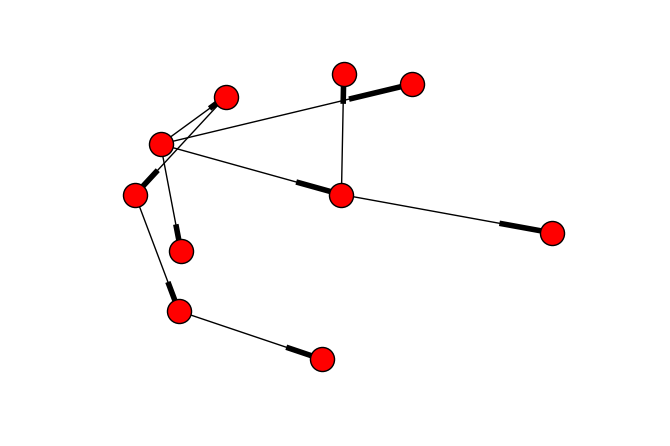

In [56]:
networkx.draw(tree_bfs)
plt.show()

In [58]:
from networkx import algorithms
algorithms.shortest_path(g,0,5)

[0, 5]

In [59]:
algorithms.shortest_path(g,0,7)

[0, 5, 7]

In [60]:
algorithms.average_shortest_path_length(g)

1.9777777777777779

In [62]:
algorithms.all_pairs_shortest_path(g)

{0: {0: [0],
  1: [0, 1],
  2: [0, 2],
  3: [0, 3],
  4: [0, 1, 4],
  5: [0, 5],
  6: [0, 1, 6],
  7: [0, 5, 7],
  8: [0, 5, 7, 8],
  9: [0, 5, 7, 8, 9]},
 1: {0: [1, 0],
  1: [1],
  2: [1, 0, 2],
  3: [1, 3],
  4: [1, 4],
  5: [1, 0, 5],
  6: [1, 6],
  7: [1, 6, 7],
  8: [1, 6, 7, 8],
  9: [1, 6, 7, 8, 9]},
 2: {0: [2, 0],
  1: [2, 0, 1],
  2: [2],
  3: [2, 3],
  4: [2, 3, 4],
  5: [2, 5],
  6: [2, 3, 6],
  7: [2, 5, 7],
  8: [2, 5, 7, 8],
  9: [2, 5, 7, 8, 9]},
 3: {0: [3, 0],
  1: [3, 1],
  2: [3, 2],
  3: [3],
  4: [3, 4],
  5: [3, 5],
  6: [3, 6],
  7: [3, 5, 7],
  8: [3, 5, 7, 8],
  9: [3, 5, 7, 8, 9]},
 4: {0: [4, 1, 0],
  1: [4, 1],
  2: [4, 3, 2],
  3: [4, 3],
  4: [4],
  5: [4, 3, 5],
  6: [4, 6],
  7: [4, 6, 7],
  8: [4, 6, 7, 8],
  9: [4, 6, 7, 8, 9]},
 5: {0: [5, 0],
  1: [5, 0, 1],
  2: [5, 2],
  3: [5, 3],
  4: [5, 3, 4],
  5: [5],
  6: [5, 6],
  7: [5, 7],
  8: [5, 7, 8],
  9: [5, 7, 8, 9]},
 6: {0: [6, 1, 0],
  1: [6, 1],
  2: [6, 3, 2],
  3: [6, 3],
  4: [6, 4],
  5: 

In [63]:
algorithms.all_pairs_shortest_path(g)[5]

{0: [5, 0],
 1: [5, 0, 1],
 2: [5, 2],
 3: [5, 3],
 4: [5, 3, 4],
 5: [5],
 6: [5, 6],
 7: [5, 7],
 8: [5, 7, 8],
 9: [5, 7, 8, 9]}

#### Dijkstra’s Algorithm

In [64]:
algorithms.dijkstra_path(g,1,5)

[1, 0, 5]

In [65]:
algorithms.dijkstra_predecessor_and_distance(g,1,5)

({0: [1],
  1: [],
  2: [0, 3],
  3: [1],
  4: [1],
  5: [0, 3, 6],
  6: [1],
  7: [6],
  8: [7],
  9: [8]},
 {0: 1, 1: 0, 2: 2, 3: 1, 4: 1, 5: 2, 6: 1, 7: 2, 8: 3, 9: 4})

In [66]:
import itertools

In [67]:
g.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [68]:
list(itertools.combinations(g.nodes(),2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9)]

In [69]:
nn = g.nodes()

In [70]:
nn

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [71]:
nn[:4]

[0, 1, 2, 3]

In [72]:
pairs = list(itertools.combinations(nn[:4],2))

In [73]:
pairs

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [74]:
for pair in itertools.combinations(nn[:8],2):
    print (algorithms.shortest_path(g,*pair),algorithms.dijkstra_path(g,*pair))

[0, 1] [0, 1]
[0, 2] [0, 2]
[0, 3] [0, 3]
[0, 1, 4] [0, 1, 4]
[0, 5] [0, 5]
[0, 1, 6] [0, 1, 6]
[0, 5, 7] [0, 5, 7]
[1, 0, 2] [1, 0, 2]
[1, 3] [1, 3]
[1, 4] [1, 4]
[1, 0, 5] [1, 0, 5]
[1, 6] [1, 6]
[1, 6, 7] [1, 6, 7]
[2, 3] [2, 3]
[2, 3, 4] [2, 3, 4]
[2, 5] [2, 5]
[2, 3, 6] [2, 3, 6]
[2, 5, 7] [2, 5, 7]
[3, 4] [3, 4]
[3, 5] [3, 5]
[3, 6] [3, 6]
[3, 5, 7] [3, 5, 7]
[4, 3, 5] [4, 3, 5]
[4, 6] [4, 6]
[4, 6, 7] [4, 6, 7]
[5, 6] [5, 6]
[5, 7] [5, 7]
[6, 7] [6, 7]


In [75]:
from random import choice